## **TD : Clustering d’images**

Le but de ce TD est d'implémenter l'algorithme KMeans et de l'appliquer aux pixels d'une image afin de regrouper automatiquement les pixels ayant des couleurs proches. Chaque pixel est composé de trois composantes: rouge, vert et bleue comprises entre 0 et 255. Votre programme prendra en entrée une image et donnera en sortie une image où tous les pixels appartenant au même cluster (au même groupe) auront la même couleur (par exemple la couleur moyenne du cluster). Le nombre de clusters sera donné en paramètre. Votre programme pourra également fournir en sortie une image pour chacun des clusters trouvés.


### Lecture de l'image :

--2025-11-12 16:14:09--  https://upload.wikimedia.org/wikipedia/commons/8/86/Emphysema_H_and_E.jpg
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving upload.wikimedia.org (upload.wikimedia.org)... 185.15.58.240, 2a02:ec80:600:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|185.15.58.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 104957 (102K) [image/jpeg]
Saving to: ‘Emphysema_H_and_E.jpg’

Emphysema_H_and_E.j 100%[===================>] 102.50K  --.-KB/s    in 0.04s   

2025-11-12 16:14:09 (2.81 MB/s) - ‘Emphysema_H_and_E.jpg’ saved [104957/104957]



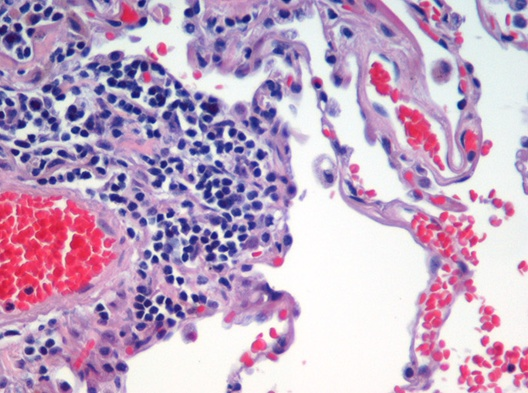

In [1]:
!wget -nc https://upload.wikimedia.org/wikipedia/commons/8/86/Emphysema_H_and_E.jpg

from PIL import Image
im = Image.open('Emphysema_H_and_E.jpg')
display(im)

Afin de manipuler les données, nous allons utiliser un array Numpy :

In [2]:
import numpy as np
rgb = np.array(im.convert('RGB').getdata())

## **KMeans** :

### Ecrire une fonction qui calcule la distance euclidienne entre deux `array` numpy :

In [6]:
def euc_dist(a,b):
  return np.sqrt(np.power(a-b,2).sum())

print(euc_dist(rgb[0],rgb[1]))

18.547236990991408


 ### Corrigé

In [8]:
def euc_dist(a,b):
    return np.sqrt(np.power(a-b,2).sum())

print(euc_dist(rgb[0],rgb[1]))

18.547236990991408


 ### Écrire une fonction qui calcule la moyenne d'une liste de pixels

In [23]:
def average(points):
  return np.rint(sum(points) / len(points))

print(average([rgb[0],rgb[1],rgb[2]]))

[139. 129. 153.]


 ### Corrigé :

In [20]:
def average(points):
    N = len(points)
    if N==0:
        return np.random.randint(0, 255, 3)
    else:
        avr = np.array([0, 0, 0])
        for p in points:
            avr += p
        return np.rint(avr / N)

print(average([rgb[0],rgb[1],rgb[2]]))

[139. 129. 153.]


### Choix de la valeur de `k` et initialisation de la valeur des centres



In [24]:
k = 4
means = [np.random.randint(0, 255, 3) for _ in range(k)]

### Écrire une fonction qui renvoie l'indice du cluster de plus proche dans `means`

In [25]:
def assign(p, means):
    minimum = np.inf
    for i in range(len(means)):
        d = euc_dist(p, means[i])
        if minimum > d:
            minimum = d
            index = i
    return index

print(assign(rgb[0],means))

0


 ### Corrigé :

In [26]:
def assign(p, means):
    N = len(means)
    minimum = np.inf
    for i in range(N):
        dst = euc_dist(p, means[i])
        if minimum > dst:
            minimum = dst
            index = i
    return index

print(assign(rgb[0],means))

0


### Écrire l'algorithme de KMeans avec alternance affectation et recalcul des centres

In [ ]:
# Votre code ici


 ### Corrigé :

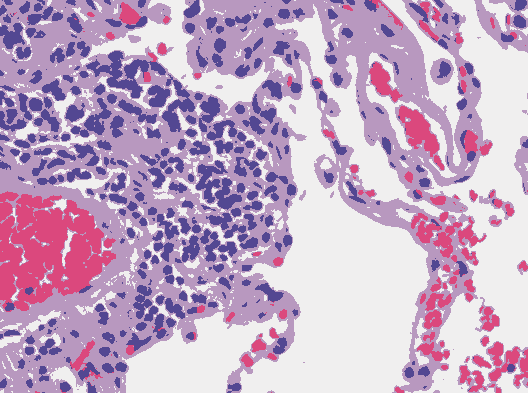

In [ ]:
from tqdm.notebook import tqdm

I = 5
N = len(rgb)
label = {i: 0 for i in range(N)}

for it in tqdm(range(0,I)):
    clusters = {i: [] for i in range(k)}

    # assign
    for i in range(N):
        index = assign(rgb[i], means)
        clusters[index] += [rgb[i]]
        label[i] = index

    # recompute
    for j in range(k):
        centroid = average(clusters[j])
        means[j] = centroid

out = map(lambda x: tuple(map(int,means[x])), list(label.values()))

image = Image.new('RGB', (im.width, im.height))

image.putdata(list(out))
display(image)

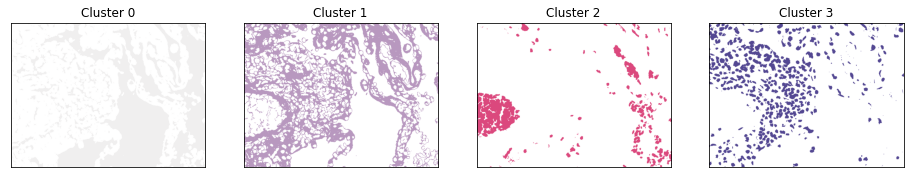

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(16,12))
for c in range(0, k):
  ax = fig.add_subplot(1, k, c+1)
  sub = map(lambda x: tuple(map(int,means[x])) if x == c else tuple([255,255,255]), list(label.values()))
  image = Image.new('RGB', (im.width, im.height))
  image.putdata(list(sub))
  imgplot = plt.imshow(image)
  plt.title('Cluster '+str(c))
  ax.set_xticks([])
  ax.set_yticks([])
plt.show()


### Classification automatique d’une librairie d’images

Nous allons maintenant utiliser Kmeans afin de faire du clustering de plusieurs images. Il est donc nécessaire de définir une distance entre les images. La distance la plus simple (mais pas très performante) est d’utiliser l’histogramme de couleurs des images.

Nous allons utiliser les données [CIFAR10](https://www.cs.toronto.edu/ ̃kriz/cifar.html) disponible dans le package tensorflow.

Dans un premier temps n’utilisez que quelques images de 3 classes afin de développer votre code. Comme il est difficile de calculer une ”moyenne” d’images, on utilisera ici le médoı̈de comme représentant d’un cluster, c’est-à-dire l’objet qui minimise la distance aux autres objets du groupe.

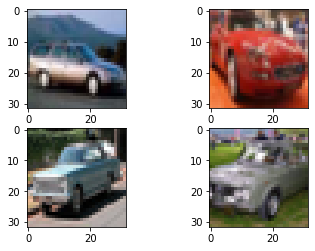

In [ ]:
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

y_train = y_train.reshape(50000,)
x_train = np.concatenate([x_train[y_train == 1][:10],
                          x_train[y_train == 2][:10],
                          x_train[y_train == 5][:10]], axis=0)
plt.subplot(221)
plt.imshow(x_train[0])
plt.subplot(222)
plt.imshow(x_train[1])
plt.subplot(223)
plt.imshow(x_train[2])
plt.subplot(224)
plt.imshow(x_train[3])
plt.show()

In [ ]:
# Votre code ici

 ### Corrigé :

In [ ]:
import math, operator
from functools import reduce

def compare(im1, im2):
    image1 = Image.fromarray(im1)
    image2 = Image.fromarray(im2)
    h1 = image1.histogram()
    h2 = image2.histogram()
    rms = math.sqrt(reduce(operator.add,map(lambda a,b: (a-b)**2, h1, h2))/len(h1))
    return rms

def assign(p, medoids):
    minimum = np.inf
    for i in range(len(medoids)):
        dst = compare(p, medoids[i])
        if minimum > dst:
            minimum = dst
            index = i
    return index

def find_medoid(cluster):
  medoid = -1
  minimum = np.inf
  for i in range(len(cluster)):
    current = cluster[i]
    dst = 0
    for j in range(len(cluster)):
      dst += compare(cluster[j], current)

    if minimum > dst:
        minimum = dst
        medoid = i
  return cluster[medoid]


In [ ]:
from tqdm.notebook import tqdm

I = 20
N = len(x_train)
label = {i: 0 for i in range(N)}

np.random.seed(56)
k = 4
medoids = [x_train[np.random.randint(len(x_train))] for _ in range(k)]

for it in tqdm(range(0,I)):
    clusters = {i: [] for i in range(k)}

    # assign
    for i in range(len(x_train)):
        index = assign(x_train[i], medoids)
        clusters[index] += [x_train[i]]
        label[i] = index

    # recompute
    for j in range(k):
        medoids[j] = find_medoid(clusters[j])


c0 : 12


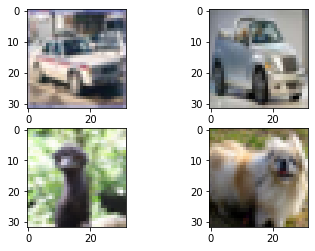


 

c1 : 14


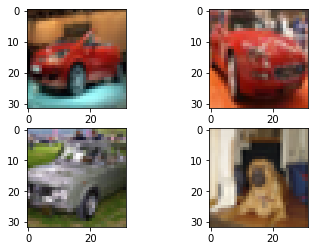


 

c2 : 1


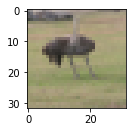


 

c3 : 3


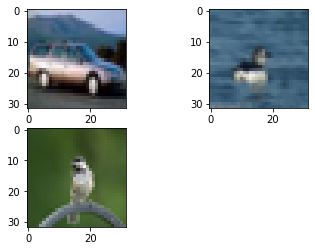

In [ ]:
for i in range(len(clusters)):
  print('c'+str(i)+' : '+str(len(clusters[i])))
  dst = []
  for j in range(len(clusters[i])):
    dst += [compare(clusters[i][j],medoids[i])]

  v = sorted(range(len(dst)), key = lambda sub: dst[sub])[:4]

  plt.subplot(221)
  plt.imshow(medoids[i])

  for j in range(1,len(v)):
    plt.subplot('22'+str(j+1))
    plt.imshow(clusters[i][v[j]])
  plt.show()

  print('\n \n')